In [1]:
# from pdf2image import convert_from_path, convert_from_bytes
import torch
from functools import partial
from PIL import Image
from transformers import Pix2StructForConditionalGeneration as psg
from transformers import Pix2StructProcessor as psp

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = psg.from_pretrained("google/pix2struct-docvqa-base").to(DEVICE) 
processor = psp.from_pretrained("google/pix2struct-docvqa-base")

#to-be/Pix2StructGhega
# google textcaps-base or ocrvqa-base docvqa-base

In [3]:
#docvqa
def generate(model, processor, img, questions):
  inputs = processor(images=[img for _ in range(len(questions))], 
           text=questions, return_tensors="pt").to(DEVICE)
  predictions = model.generate(**inputs, max_new_tokens=512)
  return zip(questions, processor.batch_decode(predictions, skip_special_tokens=True))

#doc parsing
# def generate(model, processor, img):
#   inputs = processor(images=[img], return_tensors="pt").to(DEVICE)
#   predictions = model.generate(**inputs, max_new_tokens=512)
#   return processor.batch_decode(predictions, skip_special_tokens=True)


# def convert_pdf_to_image(filename, page_no):
#     return convert_from_path(filename)[page_no-1]

In [32]:
invoice_questions = ["what is the invoice number?",
             "what is the date of issue?",
             "What is the Grand total?",
             "What is the subtotal or nett amount?",
             "What is the GST amount?",
             "What is the company?"]

statement_questions = ["what is the date of issue?",
             "What is company?",
             "What is the total balance?"]
             #"What is the document type"]

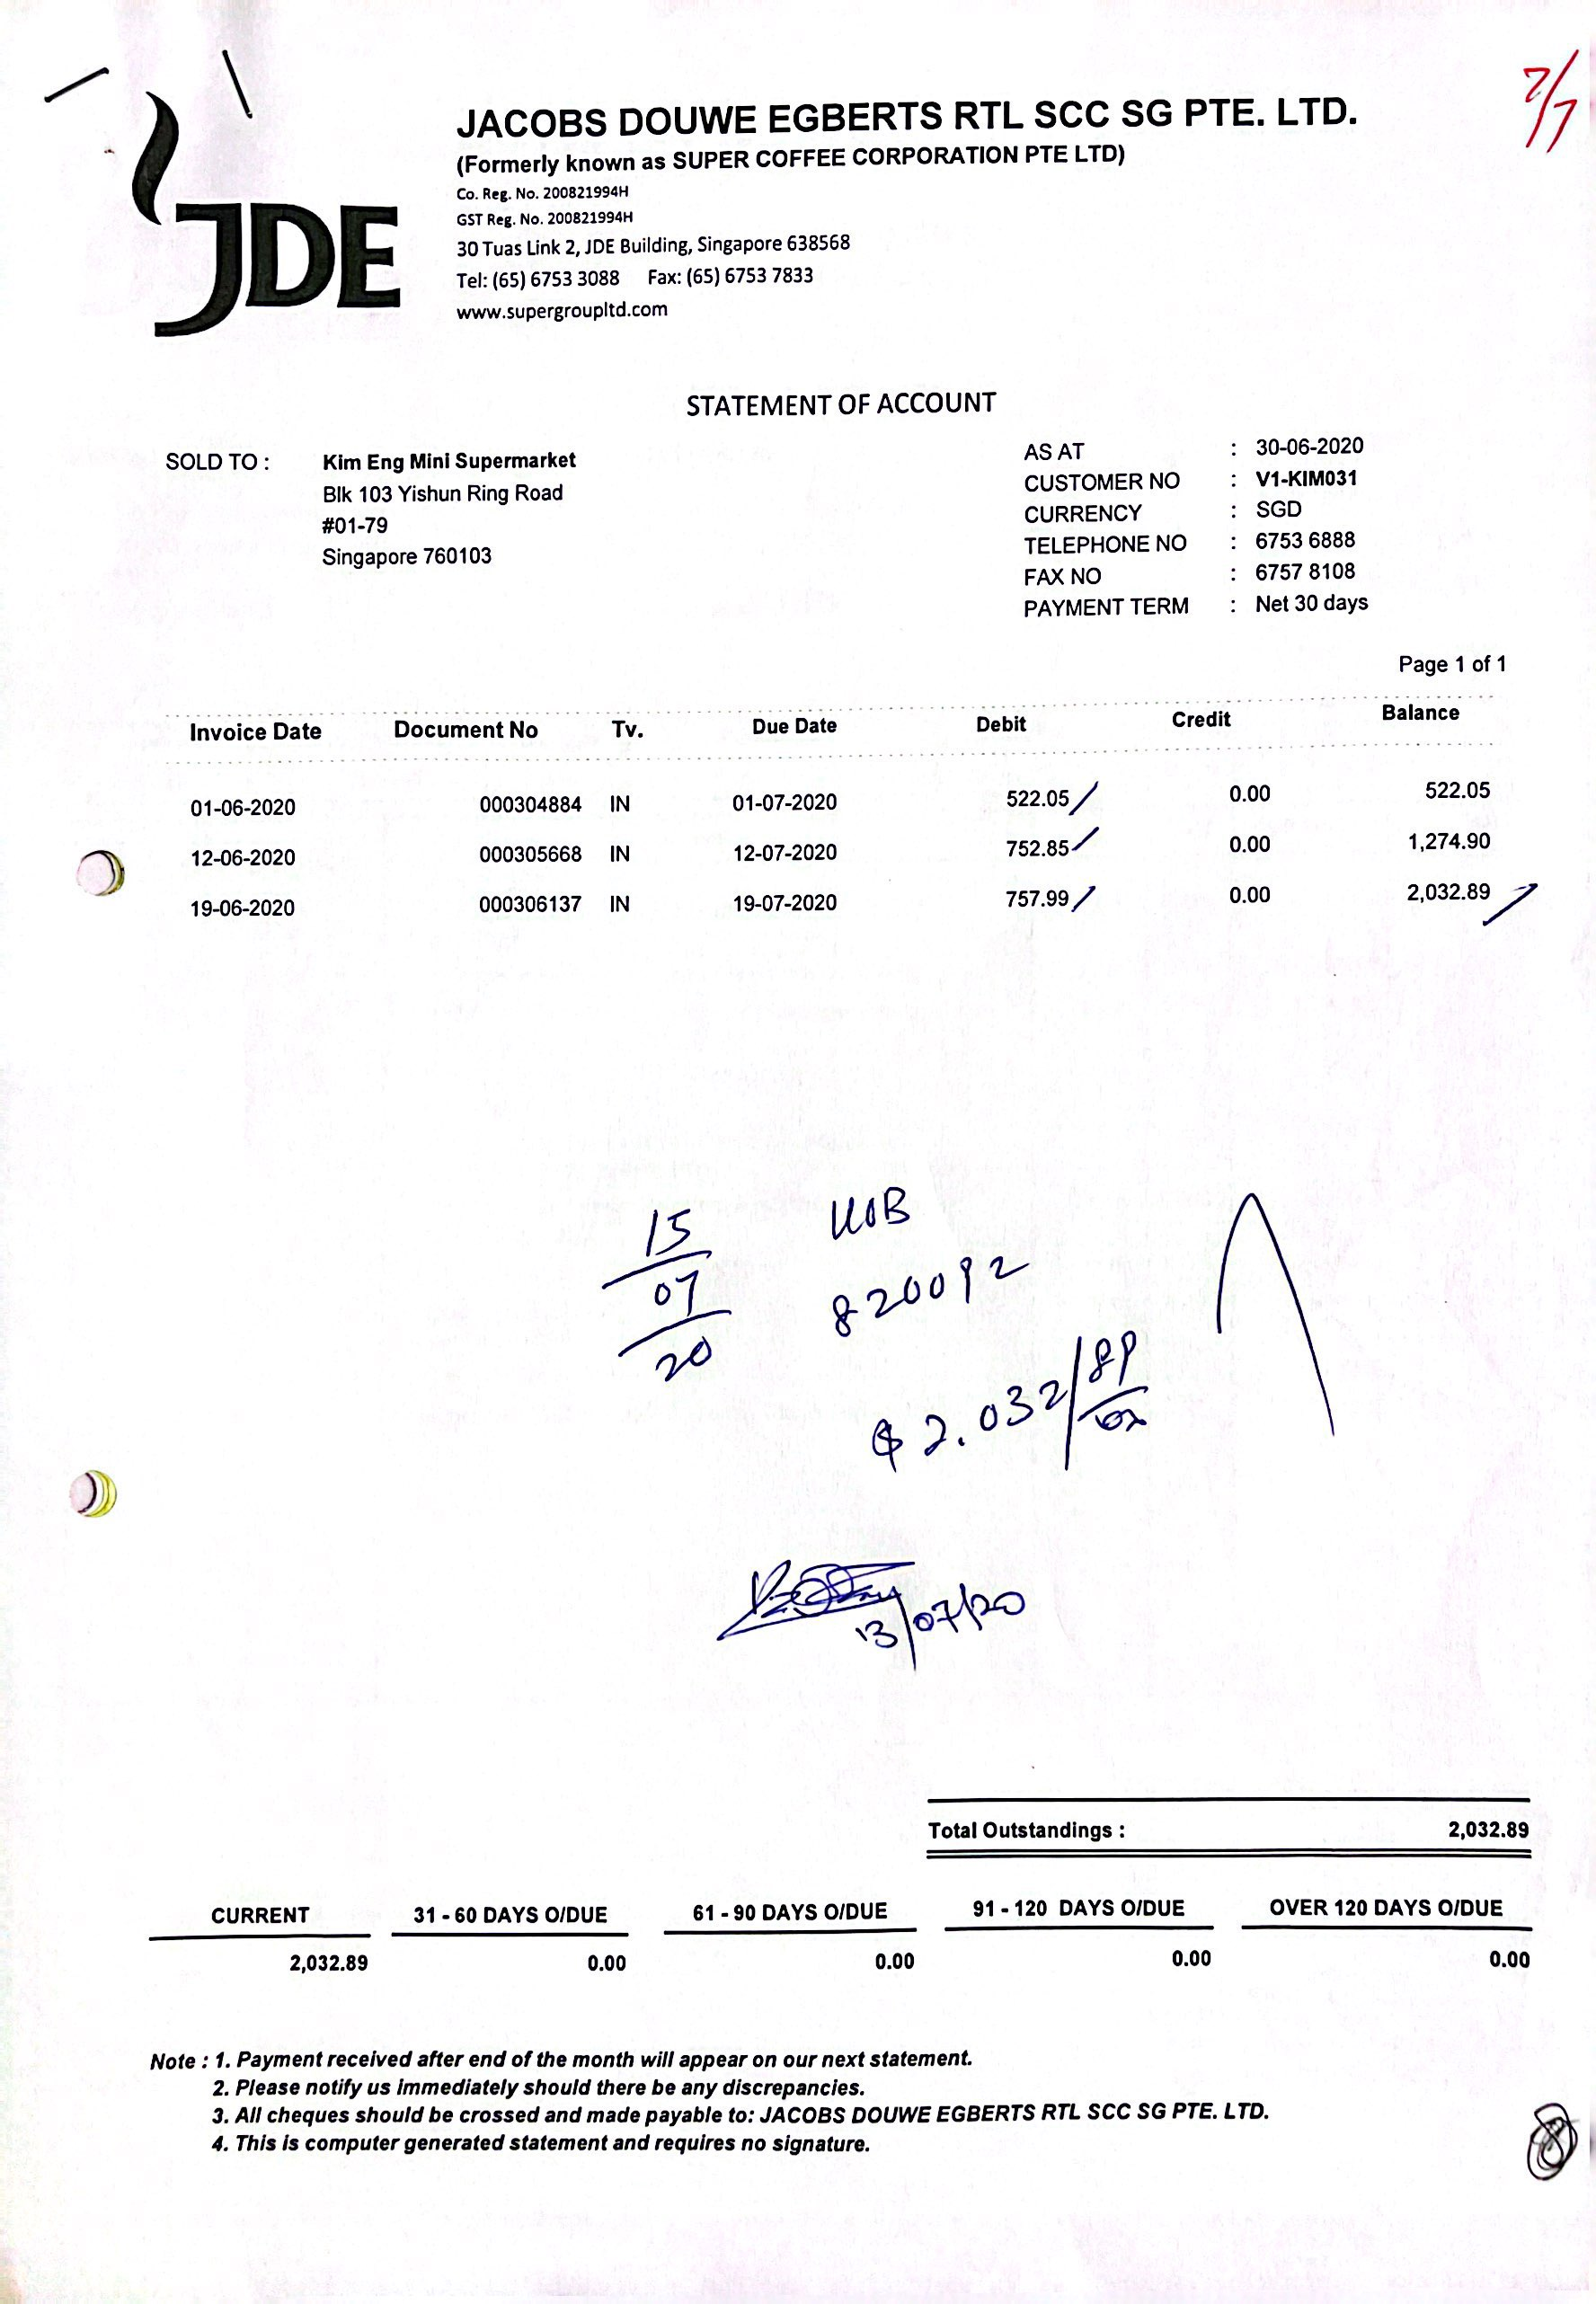

In [34]:
img_path = "../data/Invoice/CamScanner 06-20-2023 11.20_80.jpg"
# img_path = "../data/Invoice/R-4-23.jpg"
image = Image.open(img_path).convert("RGB")
display(image)
docType = "statement"

In [35]:
#FILENAME = "TMC5160.pdf"
# image = convert_pdf_to_image(FILENAME, PAGE_NO)
# print("pdf to image conversion complete.")
generator = partial(generate, model, processor)
if docType == "invoice":
    completions = generator(image,invoice_questions)
    
else:
    completions = generator(image,statement_questions)

for completion in completions:
        print(f"{completion}")

('what is the date of issue?', '30-06-2020')
('What is company?', 'Jacobs Douwe Egberts RTL SCC SG PTE. LTD.')
('What is the total balance?', '2,032.89')
